Use RapidSim to generate 

`Upsilon4S -> {B+ -> K+ K- K+} {B- -> K- K+ K-}`
`B+ -> K+ K+ K-`

For comb bkg use Upsilon sample and make random 3-body combinations of the 6 final state Kaons.
 
Note the .config for Upsilon decay looks like

geometry : LHCb
paramsDecaying : M
paramsStable : PX, PY, PZ
@0
	name : X
@1
	name : Bp_0
@2
	name : Bm_0
@3
	name : H1
	smear : LHCbGeneric
@4
	name : H2
	smear : LHCbGeneric
@5
	name : H4
	smear : LHCbGeneric
@6
	name : H5
	smear : LHCbGeneric
	
@7
	name : H3
	smear : LHCbGeneric
@8
	name : H6
	smear : LHCbGeneric
	



In [52]:
import numpy as np
import uproot
import pandas as pd
import pickle
from matplotlib import pyplot

##Declare file paths
bkg_file = "/Users/user/BalerDev/combbkg_tree.root"
sig_file = "/Users/user/BalerDev/B2KKK_tree_55_XYZ.root"

##Declare constants
K_mass=0.494

def create_branches(df):
    """
    Function to create B mass from invariant mass of daughters
    """
    df["H1_E"]=np.sqrt(df["H1_PX"]**2+df["H1_PY"]**2+df["H1_PZ"]**2+K_mass**2)
    df["H2_E"]=np.sqrt(df["H2_PX"]**2+df["H2_PY"]**2+df["H2_PZ"]**2+K_mass**2)
    df["H3_E"]=np.sqrt(df["H3_PX"]**2+df["H3_PY"]**2+df["H3_PZ"]**2+K_mass**2)
    df["B_mass"]=np.sqrt((df["H1_E"]+df["H2_E"]+df["H3_E"])**2-(df["H1_PX"]+df["H2_PX"]+df["H3_PX"])**2-(df["H1_PY"]+df["H2_PY"]+df["H3_PY"])**2-(df["H1_PZ"]+df["H2_PZ"]+df["H3_PZ"])**2)

0         4.627048
1         6.368357
2         4.749426
3         5.962350
4         4.708531
            ...   
299995    5.285750
299996    5.293131
299997    5.288133
299998    5.277077
299999    5.301530
Name: B_mass, Length: 1000000, dtype: float64


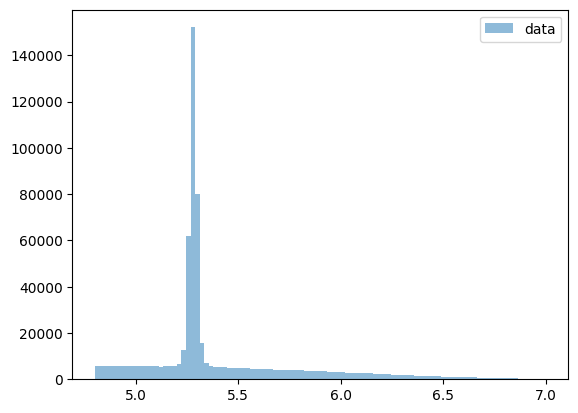

In [59]:
#Open bkg file as pandas dfs and scramble 3 body combinations to make comb bkg
tuple_bkg=uproot.open(bkg_file)["DecayTree"]
df_123=tuple_bkg.arrays(["H1_PX", "H2_PX", "H3_PX", "H1_PY", "H2_PY", "H3_PY", "H1_PZ", "H2_PZ", "H3_PZ"], library='pd')
df_456=tuple_bkg.arrays(["H4_PX", "H5_PX", "H6_PX", "H4_PY", "H5_PY", "H6_PY", "H4_PZ", "H5_PZ", "H6_PZ"], library='pd')
df_245=tuple_bkg.arrays(["H2_PX", "H4_PX", "H5_PX", "H2_PY", "H4_PY", "H5_PY", "H2_PZ", "H4_PZ", "H5_PZ"], library='pd')
df_136=tuple_bkg.arrays(["H1_PX", "H3_PX", "H6_PX", "H1_PY", "H3_PY", "H6_PY", "H1_PZ", "H3_PZ", "H6_PZ"], library='pd')

df_456.rename(columns={"H4_PX": "H1_PX", "H5_PX": "H2_PX", "H6_PX": "H3_PX", "H4_PY": "H1_PY", "H5_PY": "H2_PY", "H6_PY": "H3_PY", "H4_PZ": "H1_PZ", "H5_PZ": "H2_PZ", "H6_PZ": "H3_PZ"}, inplace=True)
df_245.rename(columns={"H2_PX": "H1_PX", "H4_PX": "H2_PX", "H5_PX": "H3_PX", "H2_PY": "H1_PY", "H4_PY": "H2_PY", "H5_PY": "H3_PY", "H2_PZ": "H1_PZ", "H4_PZ": "H2_PZ", "H5_PZ": "H3_PZ"}, inplace=True)
df_136.rename(columns={"H3_PX": "H2_PX", "H6_PX": "H3_PX", "H3_PY": "H2_PY", "H6_PY": "H3_PY", "H3_PZ": "H2_PZ", "H6_PZ": "H3_PZ"}, inplace=True)

df_comb=pd.concat([df_123, df_456, df_245, df_136])


#Open sig file as pandas df
tuple_sig=uproot.open(sig_file)["DecayTree"]
df_sig=tuple_sig.arrays(tuple_sig.keys(), library='pd')
df_sig=df_sig[["H1_PX", "H2_PX", "H3_PX", "H1_PY", "H2_PY", "H3_PY", "H1_PZ", "H2_PZ", "H3_PZ"]]


tot_events=1000000
sigfrac=0.3

df=pd.concat([df_comb[:int(tot_events*(1-sigfrac))], df_sig[:int(tot_events*(sigfrac))]])
create_branches(df)

data=df["B_mass"]
print(data)
bins = np.linspace(4.8, 7, 100)

pyplot.hist(data, bins, alpha=0.5, label='data')
pyplot.legend(loc='upper right')
pyplot.show()
